# Gap Statistics
Gap-Statistics was introduced by Robert Tibshirani in the year 2000 at Stanford.
Determining the ideal number of clusters in a dataset is one of the key tasks in the clustering exercise. After the elbow method gap-statistics is one of the most prominent ones used. The basic idea is to compute the goodness of clustering measure based on average dispersion compared to a reference distribution for an increasing number of clusters. If you find this notebook helpful then upvote and also comment.


In this notebook we discuss what gap statistics is all about , how to implement it and an example.
Firstly we try understand on earth what 'Gap' in gap statistics mean. As shown in the below example we see that there are 2 clusters formed and can also a graph of number of clusters vs within sum of squares.
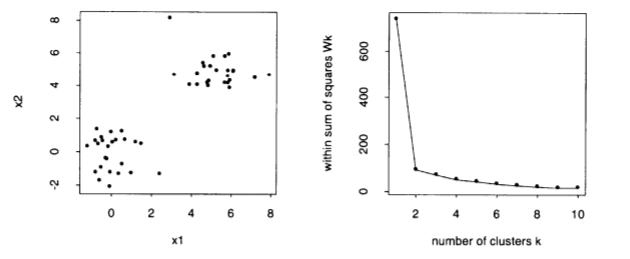
###### ***(Fig 1) Image courtesy: Robert Tibshirani's paper on gap statistics***
Here we see from elbow method that '2' is the optimal number of clusters formed. In gap statistics a log of within sum of squres of data(log(W_data)) and a log of within sum of squraes of uniform data(log(W_uniform)) are considered. Below image shows the plot of log(W_data) and log(W_uniform) with respect to number of clusters. W_uniform is basically a simulated and averaged distribution of the within-cluster distances.

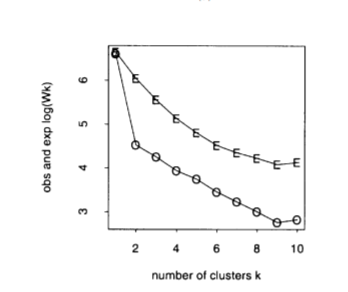
###### ***(Fig 2) Image courtesy: Robert Tibshirani's paper on gap statistics***
Now gap is found out between these two curves and is ploted. Thats why the name gap statistics.

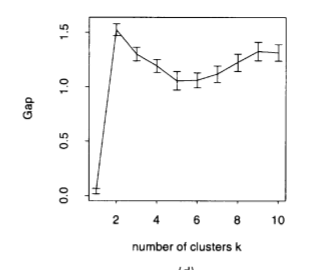
###### ***(Fig 3) Image courtesy: Robert Tibshirani's paper on gap statistics***
To find the optimal number of clusters we find the first peak that is '2' which is true according to fig 1.
For detailed explaination on math of gap statistics you can refer to [Trevor Hastie, Robert Tibshirani and Guenther Walther, Estimating the number of clusters in a data set via the gap statistics (2000)](https://doi.org/10.1111/1467-9868.00293) 

# Implementation of Gap Statistics

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, Birch
from sklearn.datasets import make_blobs
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Create Clusters

In [2]:
x, y = make_blobs(750, n_features=2, centers=3)

plt.scatter(x[:, 0], x[:, 1])
plt.show()

## Gap statistics using SciKit Learn

In [3]:
def optimalK(data, maxClusters):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    nrefs=3
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
            
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal


In [4]:
k, gapdf = optimalK(x,maxClusters=15)
print('Optimal k is: ', k)

# Results of the calculated gaps
## The first peak is the optimal k value

In [5]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

# Applying the optimal k value to the data

In [6]:
km=KMeans(n_clusters=3,init='random', random_state=0)
y_km=km.fit_predict(x,y)

In [7]:
plt.scatter(
    x[y_km==0,0], x[y_km==0,1],
    marker='s',
    label='cluster  1'
)
plt.scatter(
    x[y_km==1,0], x[y_km==1,1],
    marker='o',
    label='cluster  2'
)
plt.scatter(
    x[y_km==2,0], x[y_km==2,1],
    marker='v',
    label='cluster  3'
)
plt.scatter(
    km.cluster_centers_[:,0], km.cluster_centers_[:,1],
    marker='*',s =250,
    label='centroid'
)
plt.legend(scatterpoints=1)